In [68]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [69]:
# load train data and train labels
X_train = pd.read_csv('data/EstrogenReceptorStatus_Train.csv',index_col=0)
y_train = pd.read_csv('data/EstrogenReceptorStatus_Train_labels.txt',header=None)

# convert them to numpy arrays
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [70]:
# load test data and test labels
X_test = pd.read_csv('data/EstrogenReceptorStatus_Test.csv',index_col=0)
y_test = pd.read_csv('data/EstrogenReceptorStatus_Test_labels.txt',header=None)

# convert them to numpy arrays
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [71]:
# split training data and labels into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=14)
# check training = 60%, validation = 20% and test = 20%
print(len(y_train), len(y_val), len(y_test))

162 54 55


In [72]:
# convert features (data) to tensors
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)

# convert labels to tensors
y_train = torch.LongTensor(y_train)[:,0]
y_val = torch.FloatTensor(y_val)[:,0]
y_test = torch.LongTensor(y_test)[:,0]


In [73]:
epochs = 10
batch_size = 25
n_features = 162
n_examples_train =len(y_train)
n_examples_test = len(y_test)

In [74]:
def step(weighted_sum):
    most_probable = weighted_sum.argmax().item()
    output = 0 if most_probable < 0 else 1
    output = torch.tensor(output)
    return output

In [75]:
# create the Neural Network, it is a FeedForward
class Network(nn.Module):
    # create the layers of the Network: input layer, two hidden layers, output layer.
    def __init__(self, in_features=n_features, h1=30, h2=30, out_features=2):
        super().__init__() # instantiate the model
        torch.manual_seed(14)
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    # set the activations functions that will be used in every layer
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.out(x))
        return x
    

In [76]:
network = Network()

# set the criterion model to measure the loss/error
loss_criterion = nn.CrossEntropyLoss()
# set the optimizer and learning rate
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

nan
nan
nan
nan
nan
nan
0.8244420886039734
nan
nan
nan
nan
nan
nan
0.6465949416160583
nan
nan
nan
nan
nan
nan
0.6465949416160583
nan
nan
nan
nan
nan
nan
0.6465949416160583
nan
nan
nan
nan
nan
nan
0.6465949416160583
nan
nan
nan
nan
nan
nan
0.6465949416160583
nan
nan
nan
nan
nan
nan
0.6465949416160583
nan
nan
nan
nan
nan
nan
0.6465949416160583
nan
nan
nan
nan
nan
nan
0.6465949416160583
nan
nan
nan
nan
nan
nan
0.6465949416160583


Text(0, 0.5, 'loss/error')

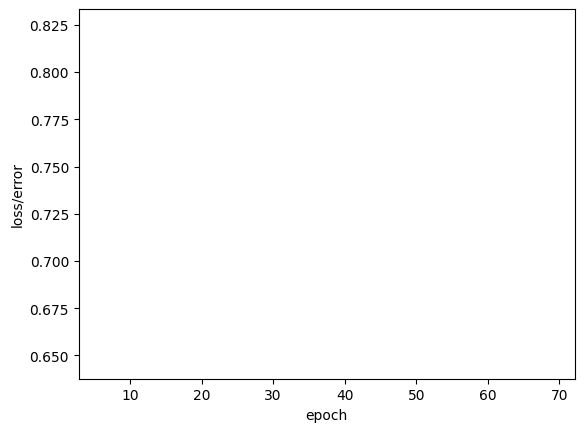

In [77]:
# train the model
losses = []
stop = (n_examples_train//batch_size)*batch_size

def predict_part(a, b):
    # go for a prediction
    y_pred = network.forward(X_train[a:b, :])
    # measure the loss/error
    loss = loss_criterion(y_pred, y_train[a:b])
    print(loss.item())
    # keep track of the losses
    losses.append(loss.detach().numpy()) # we dont want it to save it as a tensor

    # back propagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

def divide_batches(n_examples, train=1):
    for begin in range(0, n_examples, batch_size):
        if begin != stop:
            final = begin=+batch_size
            # decidir si mandar a train o test
            if train: predict_part(begin, final)
            else: return(begin, final)
        else: 
            if train: predict_part(begin, X_train.shape[0])
            else: return(begin, final)

for epoch in range(epochs):
    divide_batches(n_examples_train)



# graph how the loss changes
plt.plot(range(len(losses)), losses)
plt.xlabel('epoch')
plt.ylabel('loss/error')

In [78]:
# evaluate the model in the test data
with torch.no_grad():
    a,b = divide_batches(n_examples_test, 0)
    y_eval = network.forward(X_test[a:b,:])
    loss = loss_criterion(y_eval, y_test[a:b])

In [79]:
loss

tensor(nan)

In [82]:
# test the network
correct = 0
# dont do the back propagation
with torch.no_grad():
    a,b = divide_batches(n_examples_test, 0)
    for i, data in enumerate(X_test[a:b,:]):
        y_eval = network.forward(data)
        print(y_eval.argmax().item(), y_test[i])
        # get the number of correct predicitions
        if y_eval.argmax().item() == y_test[i]: correct += 1

print(f'The network got {correct} correct predictions out of {len(y_test)} possibles!')

The network got 0 correct predictions out of 55 possibles!


In [81]:
'''
# weight and biases run
import wandb
# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="EstrogenReceptor_FeedForwardNN",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

losses = []
for epoch in range(epochs):
    for batch in range(0, )
    # go for a prediction
    y_pred = network.forward(X_train)
    # measure the loss/error
    loss = loss_criterion(y_pred, y_train)
    # back propagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()
'''

'\n# weight and biases run\nimport wandb\n# start a new wandb run to track this script\nwandb.init(\n    # set the wandb project where this run will be logged\n    project="EstrogenReceptor_FeedForwardNN",\n    \n    # track hyperparameters and run metadata\n    config={\n    "learning_rate": 0.02,\n    "architecture": "CNN",\n    "dataset": "CIFAR-100",\n    "epochs": 10,\n    }\n)\n\nlosses = []\nfor epoch in range(epochs):\n    for batch in range(0, )\n    # go for a prediction\n    y_pred = network.forward(X_train)\n    # measure the loss/error\n    loss = loss_criterion(y_pred, y_train)\n    # back propagation\n    loss.backward()\n    optimizer.step()\n    optimizer.zero_grad()    \n# [optional] finish the wandb run, necessary in notebooks\nwandb.finish()\n'